# Stochastic Modelling and Simulation

## Lab 1: Simulating Random Phenomenons

In this lab, we will see first how to generate random numbers, then we will use them to simulate a random phenomenon.
(This notebook contains parts from the course alongside the lab exercises and explanation)

### **Random draws**

All programming languages have at least one pseudo-random number generator. In general, this generator produces random numbers evenly distributed over the interval [0, 1]. This means that the probability of getting a number between 0 and 1 is the same regardless of that number, and that it is zero outside of this interval.

Python actually has many generators that can be used to reproduce classical probability distributions. They are included in the `random` package. Equivalent generators are also included in the `numpy.random` sub package, which handles (large) arrays of values. It is this second package that we will use here.

Another introduction to `numpy`, `matplotlib` and `scipy`.

#### **Basics of Random Simulation**

All random simulations are based on one basic element: simulation of uniform random variables.

First of all, we start by importing the needed libraries:

In [1]:
import math
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import numpy.random as random

The `random()` function is used to generate a single random number of uniform distribution over [0, 1[. We can also pass it an argument 'N'. It then directly generates a numpy array of N random numbers.

The algorithm used by Python is called the "Mersenne Twister" (developed by Makoto Matsumoto and Takuji Nishimura in 1997) and the sequence of numbers thus generated is much more like a sequence of uniform and independent random variables. However, it is not quite so since it is a periodic sequence. It is not a recurrence to a term $y_i = ƒ(y_{i - 1})$ as in the algorithm presented in the course, but it is still a sequence defined by recurrence.
 
The period $2^{19937} - 1$ is a prime number (Mersenne) so gigantic that in practice we will never be able to realize it. That being said, $y_1$ and $y_{2^{19937}}$ are clearly not independent since they are equal.

So, the random numbers that we're going to use in these simulations aren't really random, they're deterministic, but we're not going to have a way to distinguish them from a random sequence. We will think of the `rand` function as a black box that actually returns independent and uniform numbers on [0, 1].

It is sometimes useful to always start with the same initial value. We then use a seed that we fix with the function: seed (still from the random library). This seed is always a whole number (integer).

##### **Exercise 1:**
1. Assign a single random value to a variable and display it. Run the cell several times and check that the values taken cover the range [0, 1]. In another cell, produce a table of 10 random items and display it.

2. Initialize the seed with an integer of your choice and display the values of a random array of 10 items. Run the cell several times and verify that it always produces the same sequence.

> *Solution:* 
1. We use the imported `rand` function 

In [2]:
# we define our variable and we assign it a random value
X = random.rand()
print("X = ", X)

X =  0.9210432459179053


In [3]:
# we define our list of 10 random values
array = random.random(size = 10)
print("List = ", array)

List =  [0.87809865 0.05901705 0.00550254 0.38542704 0.83334016 0.41474039
 0.30331366 0.20482508 0.918191   0.14269788]


2. Using the seed

In [4]:
# we initialize the seed
random.seed(42)

# same seed always produces same sequence
array = random.random(size = 10)
print("List = ", array)

# reset seed
random.seed(0)

List =  [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258]


##### **Exercise 2:** 
Write a program that returns the first n linear congruential terms of the generator with modulus $m = 10^3$, multiplier $a = 121$, increments $b = 567$, and root $y_0 = 0$

1. Record the first 20 values of pseudo−random numbers.

2. The quality of this generator is to be tested by a Chi-square test with 10 intervals and $α = 0.05$.

3. Using the appropriate command, plot the histogram of the variable $U$ for $n = 104$ and where we will take 10 classes. Compare the histogram to the density function of a uniform distribution on [0, 1].

> *Solution:*

In [5]:
def congruential_method(N, m, a, b, y) :
    """
    A Unif(0, 1) pseudo-RNG using the congruential method
    """
    Y = y
    U_list = []

    for _ in range(N) :
        Y = (a * Y + b) % m
        u = Y / m
        U_list.append(u)

    return U_list

1. We display the first 20 pseudo-random numbers

In [6]:
U_list = congruential_method(20, 1000, 121, 567, 0)
print("List = ", U_list)

List =  [0.567, 0.174, 0.621, 0.708, 0.235, 0.002, 0.809, 0.456, 0.743, 0.47, 0.437, 0.444, 0.291, 0.778, 0.705, 0.872, 0.079, 0.126, 0.813, 0.94]


2. We test the quality of this generator

    Let $(I_{j})_{1{\le}j{\le}m}$ be a partition of the tested variable's domain.

    Let $H_0$ be the hypothesis: the sequence {$u_i$} is $I.I.D {\in}\;Unif(0, 1)$

    We take $p_j = P(U {\in} I_j) = \frac{length\;of\;I_j}{1 - 0}, \sum^m_{j = 1} p_j = 1$

    We calculate $ W = \sum^m_{j = 1} \frac{(V_j - np_j)^2}{np_j} = \chi^2_r $ , which follows a chi_square distribution with $r = m - 1$ degrees of freedom.

    If $ \chi^2_{r} \gt \chi^2_{\alpha, m - 1}$ , where $P(\chi^2_{r} \gt \chi^2_{\alpha, m - 1}) = \alpha$ , and $ 1 - \alpha $ is the confidence level, we rejct $H_0$

In [7]:
def chi_square_test_uniform(U_list: list, m, alpha) :
    """
    Perform a chi-square test for a uniform random number generator on [0, 1].

    Parameters:
        U_list (list or array): A list of values between 0 and 1.
        m (int): The number of bins to divide the interval [0, 1].
        alpha: The confidence level.

    Returns:
        dict: A dictionary containing the chi-square statistic, chi-square value from the table, and a flag indicating whether the null hypothesis is accepted.
    """

    if any(v < 0 or v > 1 for v in U_list):
        raise ValueError("All values must be in the range [0, 1].")
    
    bin_edges = np.linspace(0, 1, m + 1)
    observed_frequencies, _ = np.histogram(U_list, bins = bin_edges)

    # Expected frequency for uniform distribution
    expected_frequency = len(U_list) / m
    expected_frequencies = np.full(m, expected_frequency)

    chi_stat, _ = scs.chisquare(observed_frequencies, expected_frequencies, m - 1)
    chi_value = scs.chi2.ppf(1 - alpha, m - 1)

    null_hypothesis_accepted = chi_stat < chi_value

    return {
        "chi_square_statistic": chi_stat,
        "chi_square_value": chi_value,
        "null_hypothesis_accepted": null_hypothesis_accepted
    }

In [8]:
# We take m = 10, alpha = 0.05

test = chi_square_test_uniform(U_list = U_list, m = 10, alpha = 0.05)

print("Test Statistic: ", test["chi_square_statistic"])
print("Table Value: ", test["chi_square_value"])

if test["null_hypothesis_accepted"] :
    print("We accept H0")
else :
    print("We reject H0")

Test Statistic:  8.0
Table Value:  16.918977604620448
We accept H0


3. Plotting the histogram

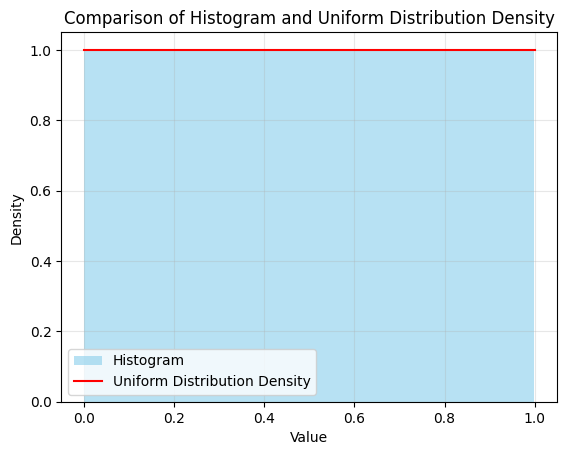

In [9]:
# Parameters
n = 10**4
num_bins = 10 

# Generate random values from a uniform distribution
u = congruential_method(n, 1000, 121, 567, 0)

# Create histogram
plt.hist(u, bins=num_bins, density=True, alpha=0.6, color='skyblue', label="Histogram")

# Plot the density of the uniform distribution on [0, 1]
x = np.linspace(0, 1, 1000)
uniform_density = np.ones_like(x)  # Density of uniform distribution on [0, 1] is constant (1)
plt.plot(x, uniform_density, 'r-', label="Uniform Distribution Density")

# Add labels, legend, and title
plt.title("Comparison of Histogram and Uniform Distribution Density")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

##### **Exercise 3:** 
Using the online help page, generate sample values and plot the corresponding histogram for the following different distributions:

1. Uniform between -10 and 10 : Compare with the theoretical curve with x ranging from -10 to 10 in steps of 0.1

2. Exponential of scale 2 : compare with the theoretical curve with x ranging from 0 to 10 in steps of 0.1

3. Normal of mean $\mu = 0$ and standard deviation $\sigma = 1$ : compare with the theoretical curve with x
ranging from -5 to 5 in steps of 0.1.

> *Solution:*

1. $Unif(-10, 10)$

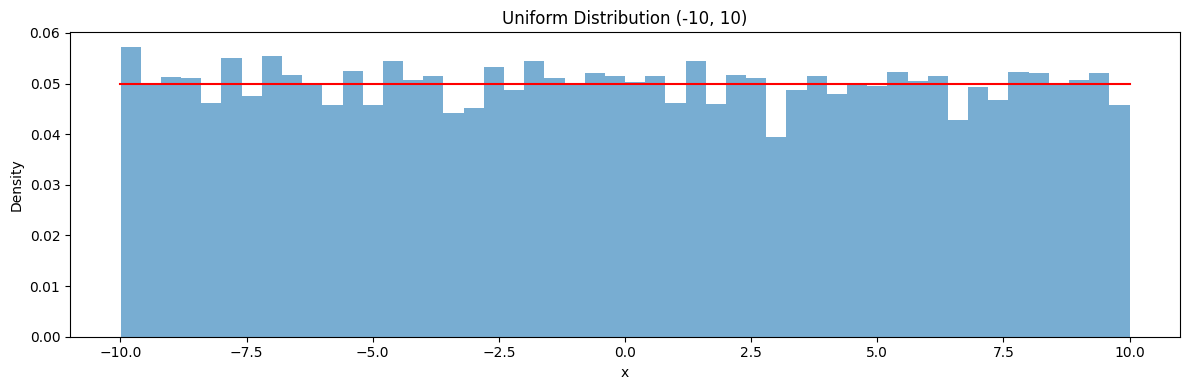

In [10]:
# 1. Uniform distribution
# Generate samples
random.seed(0)
uniform_samples = random.uniform(-10, 10, 10000)

# Theoretical curve
x_uniform = np.arange(-10, 10.1, 0.1)
uniform_pdf = scs.uniform.pdf(x_uniform, loc=-10, scale=20) # -10 is starting point, 20 is axis width

# Plot
plt.figure(figsize=(12, 4))
plt.hist(uniform_samples, bins = 50, density = True, alpha = 0.6, label = 'Sampled Data')
plt.plot(x_uniform, uniform_pdf, 'r', label='Theoretical Curve')
plt.title('Uniform Distribution (-10, 10)')
plt.xlabel('x')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

2. $Exp(\frac{1}{2})$

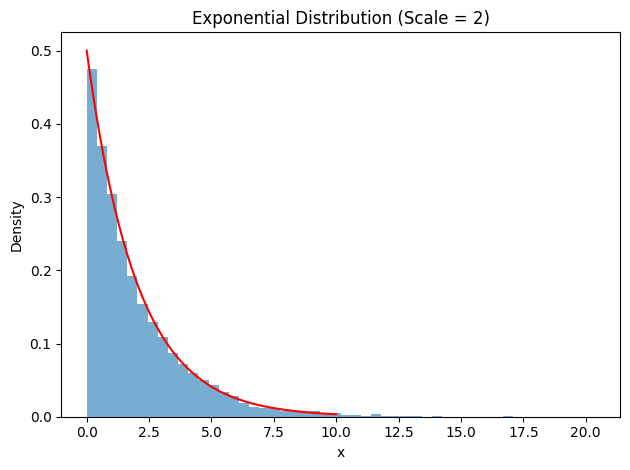

In [11]:
# 2. Exponential distribution
# Generate samples
exp_samples = random.exponential(scale=2, size=10000)

# Theoretical curve
x_exp = np.arange(0, 10.1, 0.1)
exp_pdf = scs.expon.pdf(x_exp, scale=2)

# Plot
plt.hist(exp_samples, bins=50, density=True, alpha=0.6, label='Sampled Data')
plt.plot(x_exp, exp_pdf, 'r', label='Theoretical Curve')
plt.title('Exponential Distribution (Scale = 2)')
plt.xlabel('x')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


3. $Normal(0, 1)$

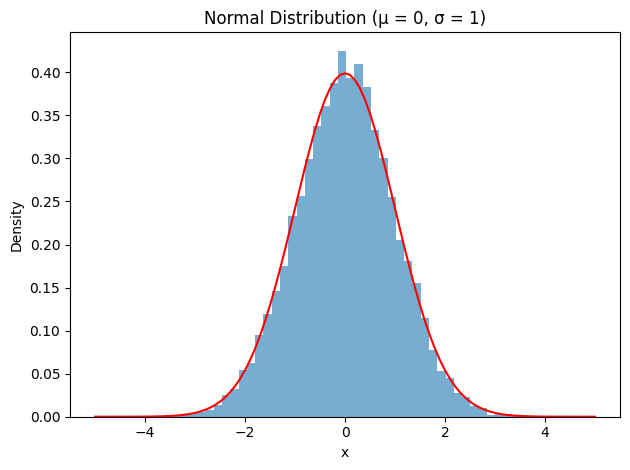

In [12]:
# 3. Normal distribution
# Generate samples
normal_samples = random.normal(loc=0, scale=1, size=10000)

# Theoretical curve
x_normal = np.arange(-5, 5.1, 0.1)
normal_pdf = scs.norm.pdf(x_normal, loc=0, scale=1)

# Plot
plt.hist(normal_samples, bins=50, density=True, alpha=0.6, label='Sampled Data')
plt.plot(x_normal, normal_pdf, 'r', label='Theoretical Curve')
plt.title('Normal Distribution (μ = 0, σ = 1)')
plt.xlabel('x')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


#### **Simulation method by inverting the distribution function**

Although the `random` package contains a number of very common laws, it often happens that we want to make draws according to more complex probability distributions. When the probability density $p(x)$ is sufficiently simple, and we can calculate the distribution function $F_X$ and its inverse $F_X^{-1}$, then a simple way, using the concepts described in the course, is :

● Generate random draws $u$ of uniform distribution on [0, 1]

● Calculate at each draw $x = F_X^{-1}(u)$ .

##### **Exercise 4:** 
Recall that the exponential distribution $Exp(\lambda)$ of parameter $\lambda$ has density function $f(x) = \lambda e^{-\lambda x}\; \mathrm{I}_{]0, 1[}(x)$

1. Write a program that simulates a random variable with an exponential distribution of parameter $\lambda$, using a random variable with a uniform distribution on [0, 1].

2. Find $m_{\lambda}$ such that if X has the distribution $Exp(\lambda)$, then $P(X > m_{\lambda}) = 0.05.$

3. Plot on the same graph and for several sample sizes the cumulative distribution function of a sample of exponential random variable of parameter 1, and the distribution function of the exponential law. Care should be taken to only represent the curve on an interval where the variable has a good chance of being present, for example [0, $m_{\lambda}$].

> *Solution:*

1. We use the method of inverse transformation, to generate an $Exp(\lambda)$ random variable. 

    Since the CDF $F$ for an exponential variable is strictly increasing, the random variable $X = F^{-1}(U)$, where $U \sim Unif(0,1)$, has distribution $X\sim F$.

    Therefore, we have:
\begin{align}
    F(x) = 1 - exp(-\lambda x) \\
    U = F(X) \\ F^{-1}(U) = F^{-1}(F(X)) \\ X = F^{-1}(U) \\ and : X = -\frac{1}{\lambda} \ln (1 - U) \\
    -\frac{1}{\lambda} \ln (V) \sim Exp(\lambda),
\end{align}
Where $V = 1-U\sim Unif(0,1)$.

In [13]:
def exp_generator(lam, N):
    """
    An Exp(lambda) pseudo-RNG using the method of inverse transformation
    """
    U = random.uniform(0, 1, size = N)
    if N == 1:
        U = U[0]
    X = (-1 / lam) * np.log(U)
    
    return X

2. We find $m_{\lambda}$ such that $P(X \gt m_{\lambda}) = 0.05 $

    We have :
    
    \begin{align}
    P(X \gt m_{\lambda}) = 0.05 \\
    1 - P(X \lt m_{\lambda}) = 0.05 \\
    1 - F_X(m_{\lambda}) = 0.05 \\
    1 - (1 - exp(-\lambda m_{\lambda})) = 0.05 \\
    exp(-\lambda m_{\lambda}) = 0.05 \\
    -\lambda m_{\lambda} = ln(0.05) \\
    m_{\lambda} = \frac{-ln(\frac{1}{0.05})}{-\lambda} \\
    m_{\lambda} = \frac{ln(20)}{\lambda}
    \end{align}

3. Plot

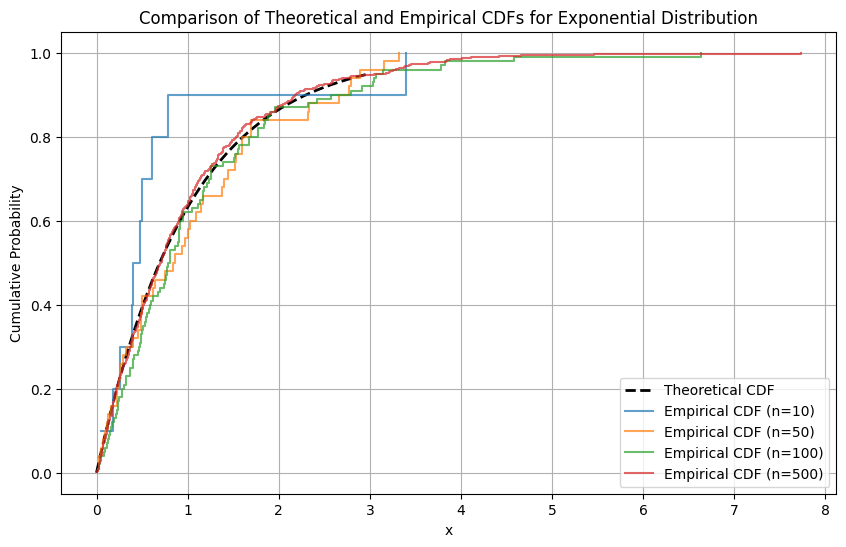

In [14]:
# Define the parameter of the exponential distribution
lambda_param = 1

# Interval to display the plot (0 to ln(20)/λ)
x_max = np.log(20) / lambda_param
x = np.linspace(0, x_max, 1000)

# Theoretical CDF of the exponential distribution
theoretical_cdf = 1 - np.exp(-lambda_param * x)

# Sample sizes to consider
sample_sizes = [10, 50, 100, 500]

# Initialize the plot
plt.figure(figsize=(10, 6))
plt.plot(x, theoretical_cdf, label="Theoretical CDF", color="black", linestyle="dashed", linewidth=2)

# Generate samples and compute empirical CDFs
for n in sample_sizes:
    samples = exp_generator(lambda_param, n)
    sorted_samples = np.sort(samples)
    empirical_cdf = np.arange(1, n + 1) / n  # Empirical CDF values
    plt.step(sorted_samples, empirical_cdf, where="post", label=f"Empirical CDF (n={n})", alpha=0.7)

# Add labels and legend
plt.title("Comparison of Theoretical and Empirical CDFs for Exponential Distribution")
plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid()
plt.show()


##### **Exercise 5:** 
Cauchy's distribution is the one with density function $ f(x) = \frac{1}{\pi (1 + x^2)}$ in $R$

1. Find the cumulative distribution function of $F_X$ of a random variable that follows this distribution.

2. What is the value of $ F_X^{-1}$ ?

3. Simulate a random variable of Cauchy's distribution with the help of a random variable of Uniform distribution on [0, 1].

4. Find $m$ such that if $X$ has a Cauchy's distribution, then $ P(|X| \gt m) = 0.05 $

5. Plot on the same graph and for several sample sizes the empirical distribution function of a sample of a cauchy random variable, and the cumulative distribution function of the cauchy distribution. Care should be taken to only represent the curve on an interval where the variable has a good chance of being present, for example $[-m, m]$.


> *Solution:*

1. CDF of X:

    We have :
    
    \begin{align}
    F_X(x) = \int_{-\infty}^{x} f(t) \, dt \\
    F_X(x) = \int_{-\infty}^{x} \frac{1}{\pi (1 + t^2)} \, dt \\
    F_X(x) = \frac{1}{\pi} \big [arctan(t) \big]^x_{-\infty} \\
    F_X(x) = \frac{1}{\pi} \big [arctan(x) - (-\frac{\pi}{2}) \big] \\
    F_X(x) = \frac{1}{\pi} arctan(x) + \frac{1}{2}
    \end{align}

    Therefore : $F_X(x) = \frac{1}{\pi} arctan(x) + \frac{1}{2} $
    

2. Value of $F_X^{-1}$

    Let $ U = F_X(x) $
    
    We have :

    \begin{align}
    U = F_X(x) \\
    U = \frac{1}{\pi} arctan(x) + \frac{1}{2} \\
    arctan(x) = \pi (U - \frac{1}{2}) \\
    x = tan(\pi (U - \frac{1}{2})) \\
    F_X^{-1}(U) = tan(\pi (U - \frac{1}{2}))
    \end{align}

3. Simulating a Cauchy's random variable

In [15]:
def cauchy_generator(N):
    """
    A Cauchy pseudo-RNG using the method of inverse transformation
    """
    U = random.uniform(0, 1, size = N)
    if N == 1:
        U = U[0]
    X = np.tan(math.pi * (U - 0.5))
    
    return X

4. Finding $m$ such that if $X$ has a Cauchy's distribution, then $ P(|X| \gt m) = 0.05 $
    
    We have :

    \begin{align}
    P(|X| \gt m) = 0.05 \\
    1 - P(|X| \lt m) = 0.05 \\
    P(-m \lt X \lt m) = 0.95 \\
    F_X(m) - F_X(-m) = 0.95 \\
    \frac{1}{\pi}arctan(m) - \frac{1}{\pi}arctan(-m) = 0.95 \\
    \frac{2}{\pi}arctan(m) = 0.95 \\
    arctan(m) = \frac{\pi}{2} 0.95 \\
    m = tan(0.475 \pi) \\
    m \approx 12.7
    \end{align}

5. Plot

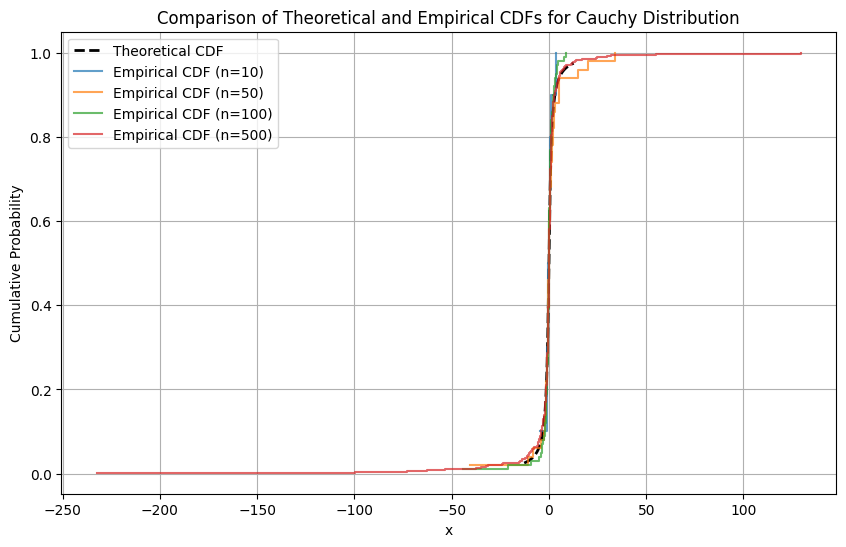

In [17]:
# Interval to display the plot (-m to m)
x_max = np.tan(0.475 * math.pi)
x = np.linspace(-x_max, x_max, 1000)

# Theoretical CDF of the exponential distribution
theoretical_cdf = (1 / math.pi) * np.arctan(x) + 0.5

# Sample sizes to consider
sample_sizes = [10, 50, 100, 500]

# Initialize the plot
plt.figure(figsize=(10, 6))
plt.plot(x, theoretical_cdf, label="Theoretical CDF", color="black", linestyle="dashed", linewidth=2)

# Generate samples and compute empirical CDFs
for n in sample_sizes:
    samples = cauchy_generator(n)
    sorted_samples = np.sort(samples)
    empirical_cdf = np.arange(1, n + 1) / n  # Empirical CDF values
    plt.step(sorted_samples, empirical_cdf, where="post", label=f"Empirical CDF (n={n})", alpha=0.7)

# Add labels and legend
plt.title("Comparison of Theoretical and Empirical CDFs for Cauchy Distribution")
plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid()
plt.show()